# Tarea \# 3 - Problema 1

## Kevin Porras Morales - C16027  &  Dylan Navarro Badilla - C15476



# Densidad de probabilidad en 3 dimensiones para un átomo hidrogenoide

El átomo de Hidrogeno es el modelo fundamental para el resto de modelos dentro de la mecánica cuántica que describen los átomos multielectronicos. Utilizando coordenadas esféricas el Hamiltoniano del átomo de Hidrogeno se puede describir 

$$
H = -\frac{\hbar^{2}}{2\mu}\nabla^{2} -\frac{e^{2}}{4\pi \epsilon_{0}r}
$$

Al resolver la ecuación de Schrodinger (calculo que me voy a saltar) podemos llegar a una solución de la función de onda general. La función de onda describe el eléctron en el átomo y depende de dos funciones, una radial y una angular.

$$
\psi_{nlm} = R_{nl}(r)Y_{l}^{m}(\theta,\phi)
$$

Donde $Y_{l}^{m}$ son los *armónicos esféricos* y $R_{nl}$ es una función que caracteriza según los polinomios de *Laguerre*.

$$
Y_{l}^{m} = (-1)^{m}\sqrt{\frac{(2l+1)}{4\pi}\cdot\frac{(l-m)!}{(l+m)!}} \, P_{l}^{m}(\cos \theta)e^{im\phi}
$$

$$
R_{nl}(r) = \sqrt{\left(\frac{2}{na_{0}}\right)^{3}\cdot \frac{(n-l-1)!}{2n[(n+l)!]}}\left(\frac{2r}{n a_{0}}\right)^{l}e^{-r/na_{0}}L_{n-l-1}^{2l+1}\left(\frac{2r}{na_{0}}\right)
$$

Con esto y la definición de densidad de probabilidad entonces queremos gráficas todos los posibles valores en el espacio donde se puede encontrar el eléctron.

In [1]:
#Librerias 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp  
import matplotlib.colors as colors 
import math

Utilizamos *Scipy* para los polinomios que vamos a utilizar (Laguerre y armónicos), ya que estos ya están descritos dentro de la biblioteca y nos podemos apoyar de ahí. 

In [2]:

a0_value = 5.29177210903e-11 

from scipy.special import eval_genlaguerre
from scipy.special import sph_harm

#Declaramos entonces la parte radial y de ahí la función de onda directamente


def R(r, n, l):
    N = np.sqrt(((2 / (n * a0_value)) ** 3) * math.factorial(n - l - 1) / (2 * n * math.factorial(n + l)))
    return N * ((2 * r / (n * a0_value)) ** l) * np.exp(-r / (n * a0_value)) * eval_genlaguerre(n-l-1, 2*l+1, 2 * r / (n * a0_value))



def wavefunc(r,theta,phi,n,l,m,):
    return R(r,n,l)*sph_harm(m,l,phi, theta)


De aquí en adelante solo me limitaré a poner el código para graicar en 3D mediante el uso de mplot3d y haré la grafica del corte transversal para tener una segunda visualización.

In [17]:
def graficar_densidades(estados):
    fig, axes = plt.subplots(nrows=(len(estados) + 3) // 4, ncols=4, figsize=(16, 4*((len(estados) + 3)//4)))
    axes = axes.flatten()

    for idx, (n, l, m) in enumerate(estados):
        r_vals_2d = np.linspace(0, 30e-10, 400)
        theta_vals_2d = np.linspace(0, np.pi, 400)
        R_grid_2d, Theta_grid_2d = np.meshgrid(r_vals_2d, theta_vals_2d, indexing='ij')
        phi_vals_2d = [0, np.pi]

        x_total, z_total, density_total = [], [], []

        for phi_fixed in phi_vals_2d:
            psi_2d = wavefunc(R_grid_2d, Theta_grid_2d, phi_fixed, n, l, m)
            prob_density_2d = np.abs(psi_2d)**2
            prob_density_2d /= np.max(prob_density_2d)
            prob_density_2d[prob_density_2d < 1e-8] = 1e-8  # Evitar ceros para LogNorm

            X_2d = R_grid_2d * np.sin(Theta_grid_2d) * np.cos(phi_fixed) * 1e10
            Z_2d = R_grid_2d * np.cos(Theta_grid_2d) * 1e10

            x_total.append(X_2d.flatten())
            z_total.append(Z_2d.flatten())
            density_total.append(prob_density_2d.flatten())

        x = np.concatenate(x_total)
        z = np.concatenate(z_total)
        density = np.concatenate(density_total)

        ax = axes[idx]
        sc = ax.scatter(
            x, z,
            c=density,
            cmap='viridis',
            norm=colors.LogNorm(vmin=1e-5, vmax=1),
            s=0.5,
            edgecolors='none'
        )
        ax.set_title(f'n={n}, l={l}, m={m}', fontsize=10)
        ax.set_xlabel('x (Å)')
        ax.set_ylabel('z (Å)')
        ax.set_aspect('equal')
        plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04, label='|ψ|²')

    for j in range(len(estados), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

C:\Users\Kevin Porras\AppData\Local\Temp\ipykernel_8056\4230900475.py:16: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  return R(r,n,l)*sph_harm(m,l,phi, theta)


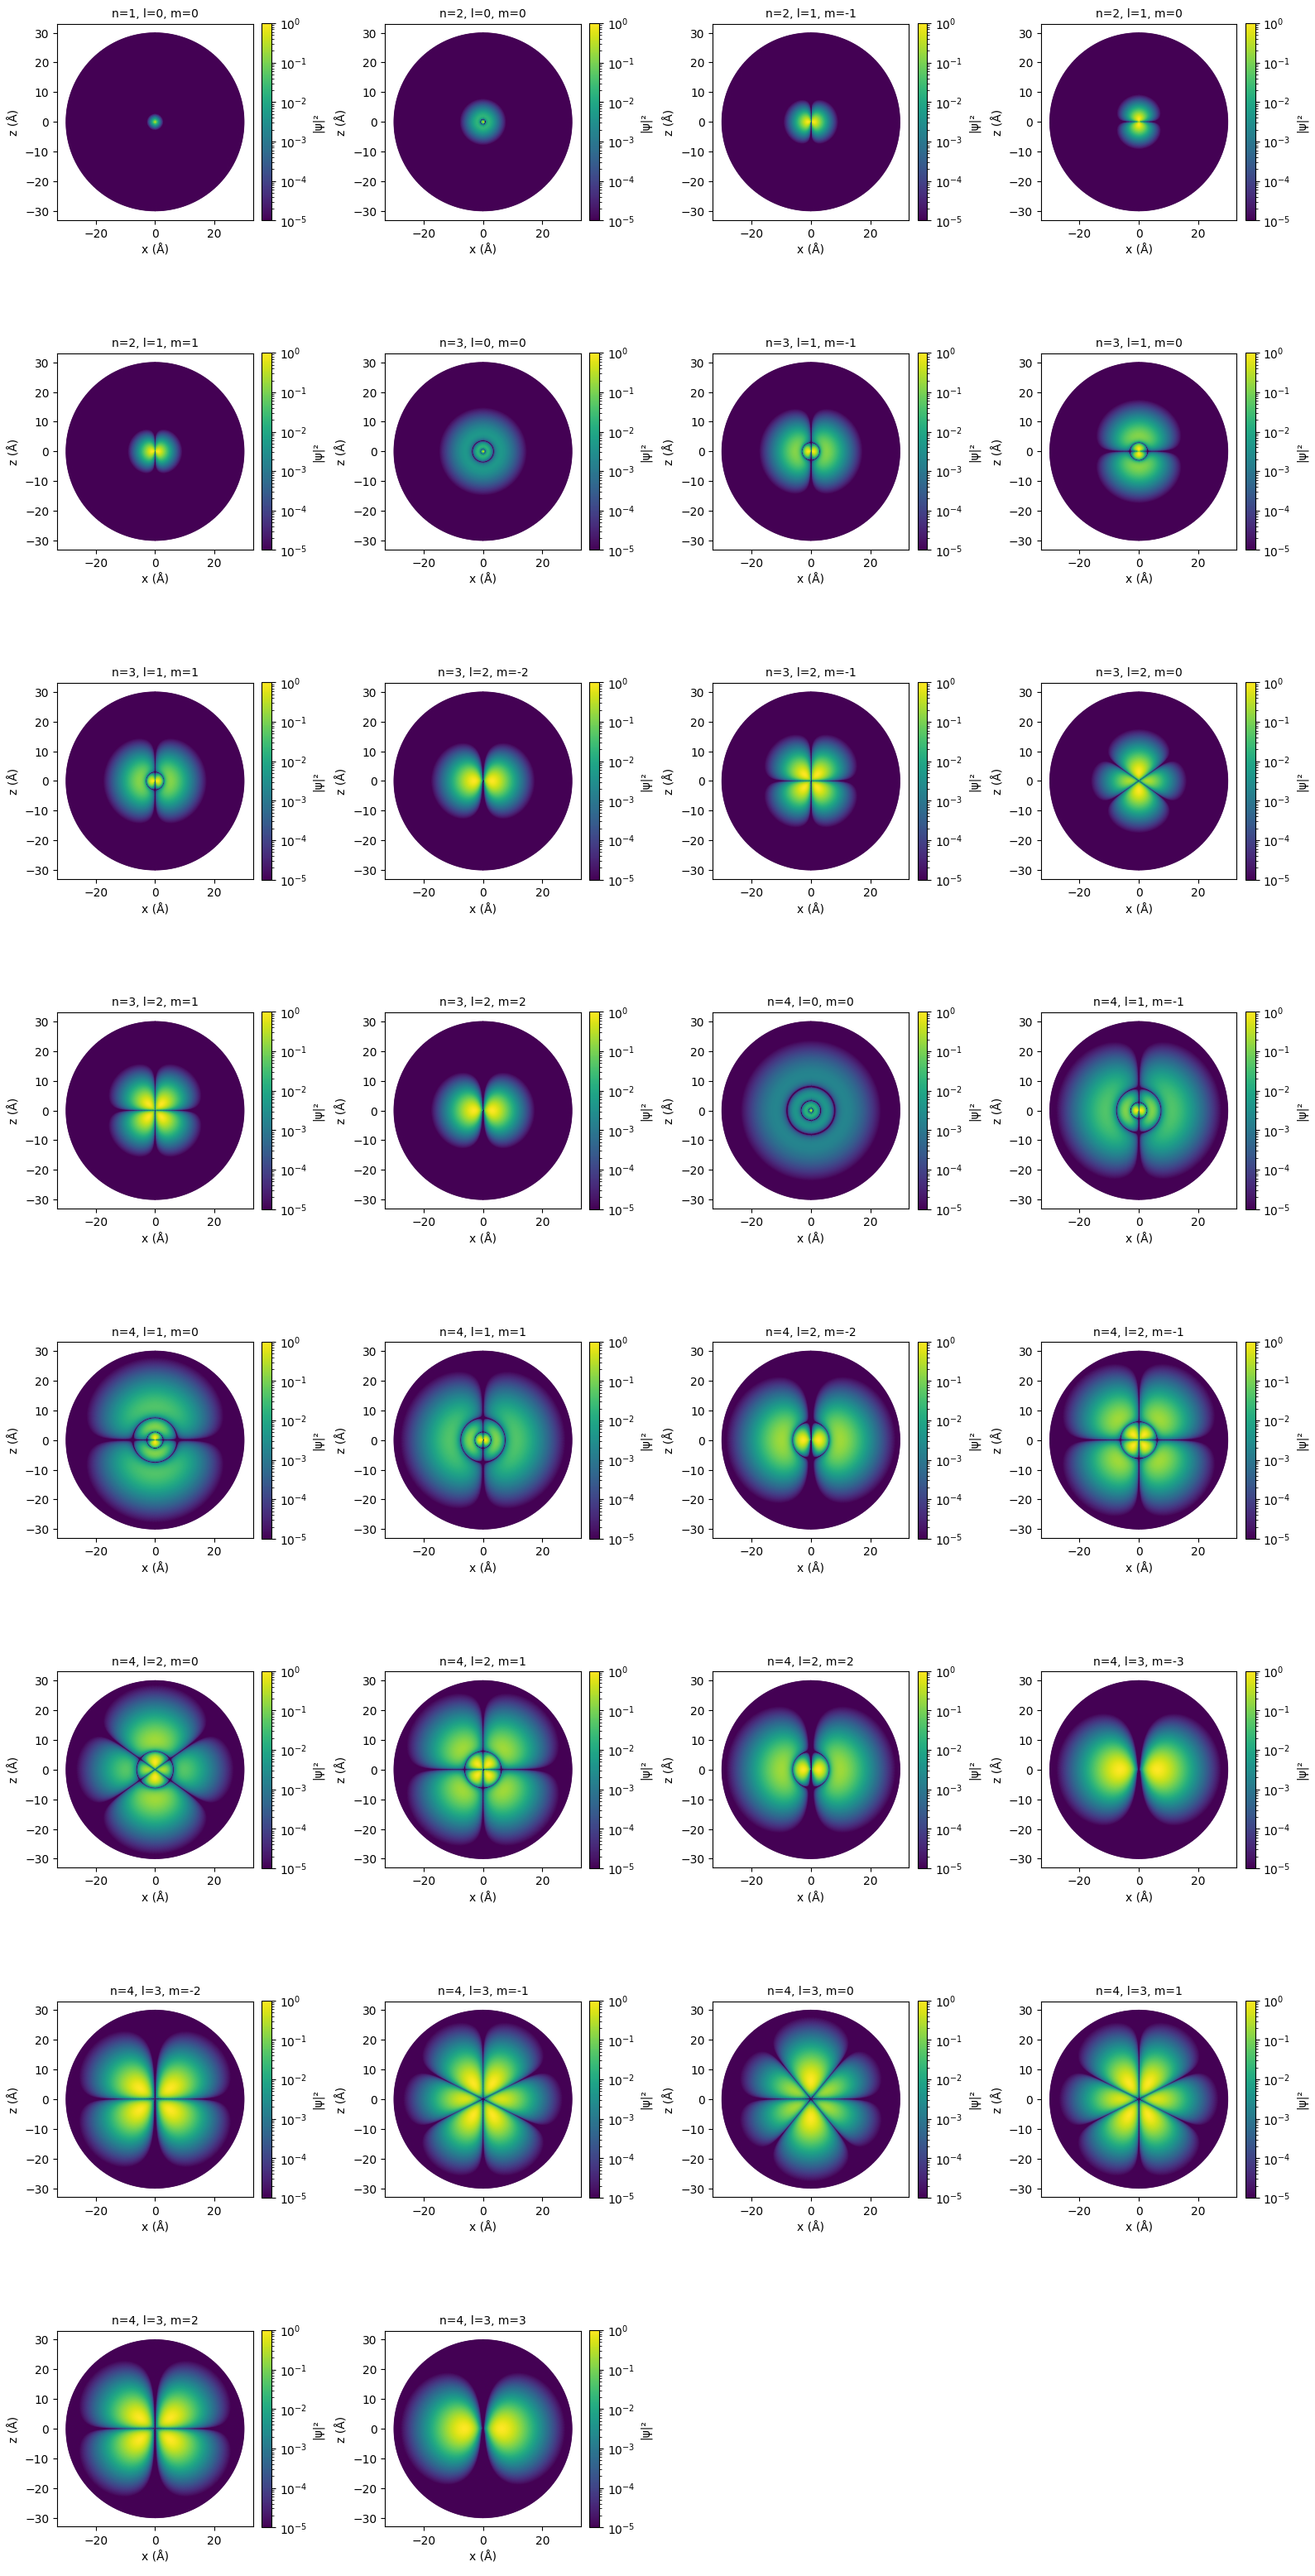

In [18]:
# Generar estados hasta n = 4
estados = [(n, l, m) for n in range(1, 5) for l in range(n) for m in range(-l, l+1)]

# Llamar función
graficar_densidades(estados)